<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [5]:


URL = "dataset_part_2.csv"
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


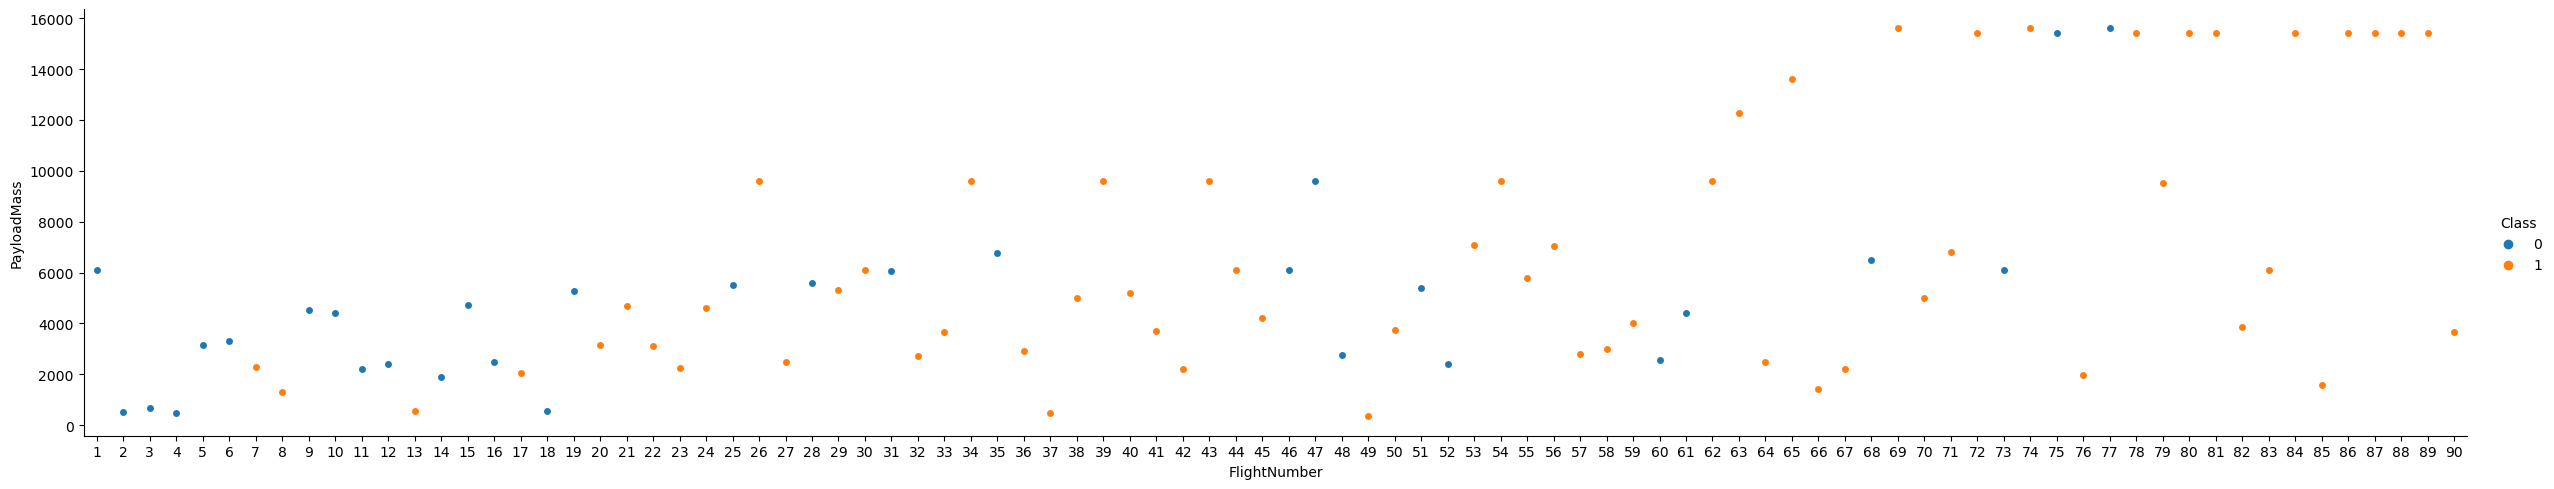

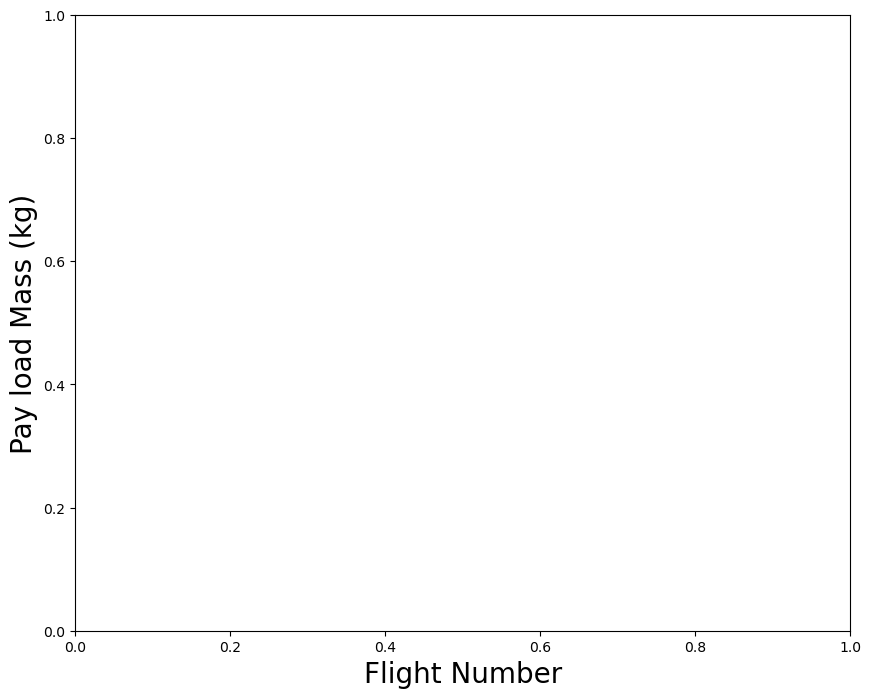

In [10]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.figure(figsize=(10, 8))
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [7]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


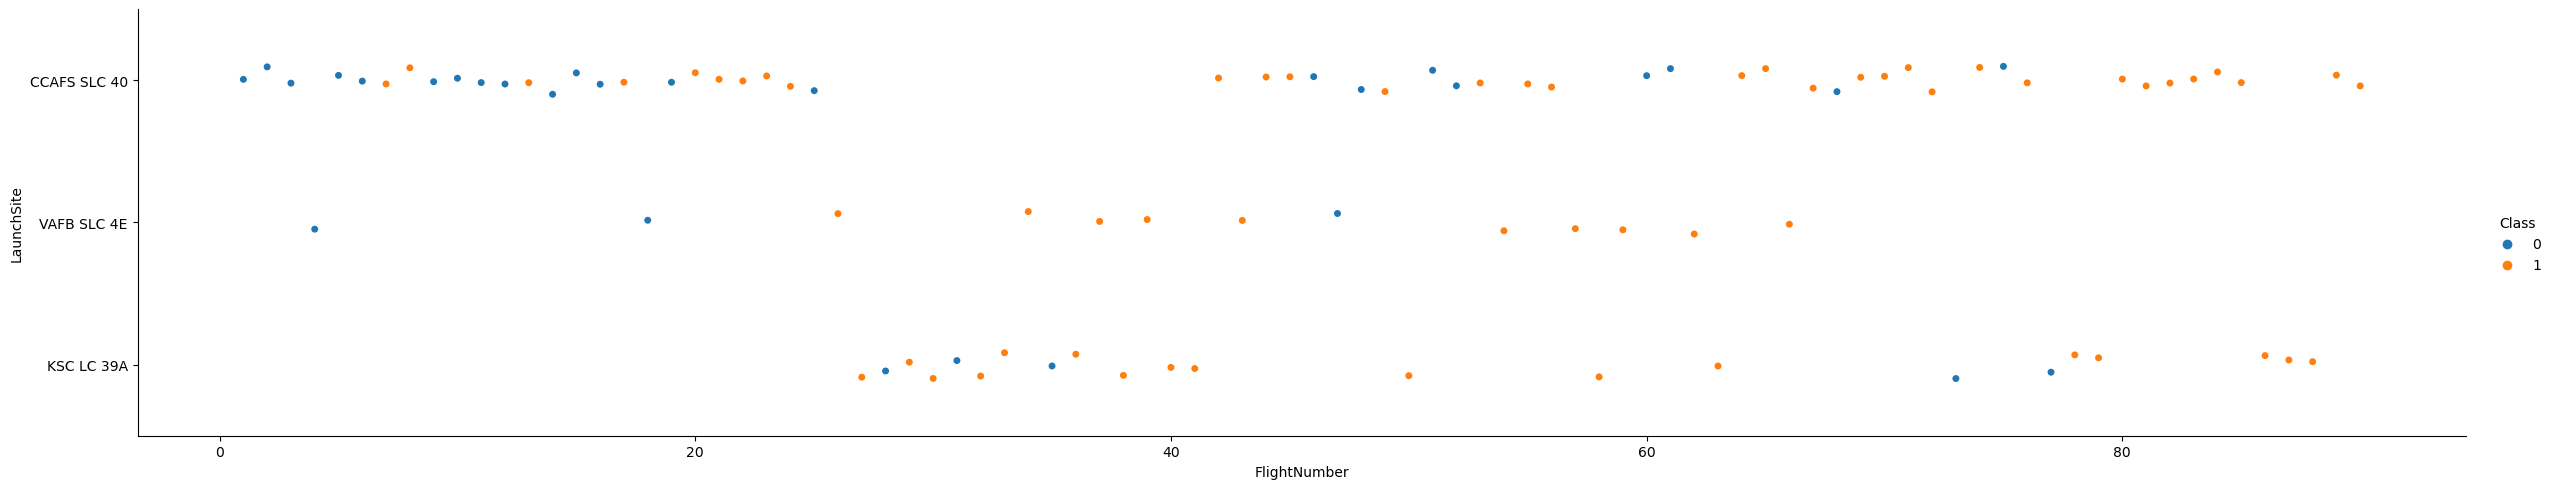

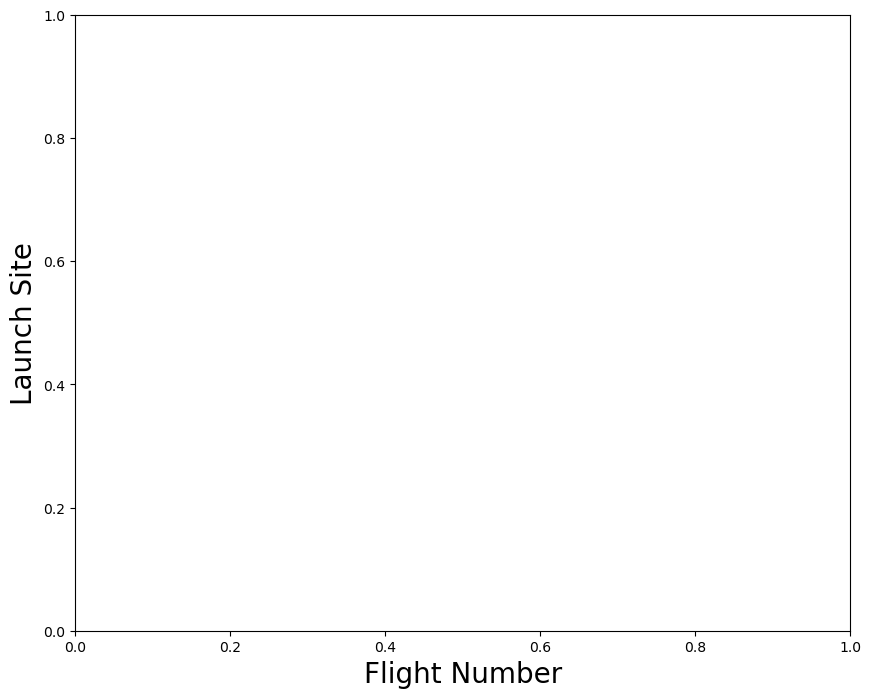

In [11]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
# Creación del gráfico
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=5)
plt.figure(figsize=(10, 8))
# Configuración de los títulos de los ejes
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)

# Muestra el gráfico
plt.show()

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


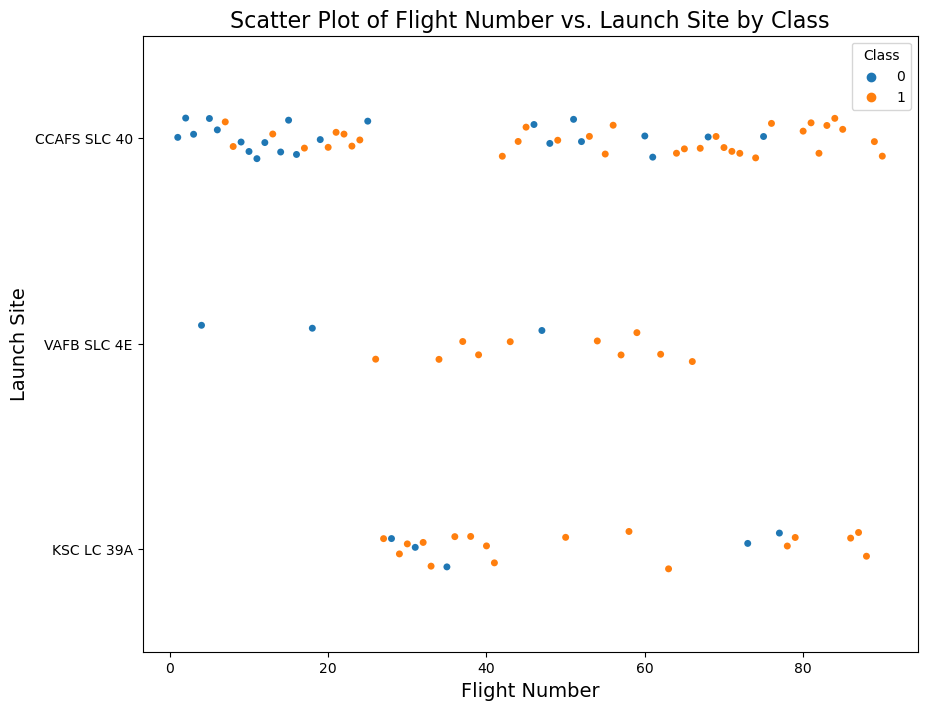

In [12]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

# Ajustando la escala y tamaño de la figura
plt.figure(figsize=(10, 8))

# Creación del gráfico de dispersión con stripplot
sns.stripplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, jitter=True)

# Configuración de los títulos de los ejes y leyenda
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Scatter Plot of Flight Number vs. Launch Site by Class", fontsize=16)
plt.legend(title='Class')

# Muestra el gráfico
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


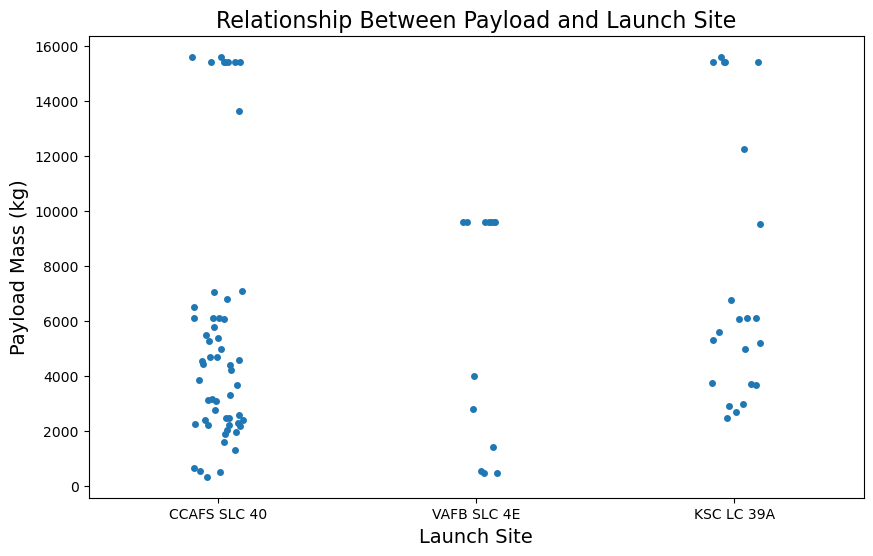

In [15]:
### TASK 2: Visualize the relationship between Payload and Launch Site

# Ajustando la escala y tamaño de la figura
plt.figure(figsize=(10, 6))

# Creación del gráfico de dispersión con stripplot para visualizar la relación
sns.stripplot(x="LaunchSite", y="PayloadMass", data=df, jitter=True)

# Configuración de los títulos de los ejes y leyenda
plt.xlabel("Launch Site", fontsize=14)
plt.ylabel("Payload Mass (kg)", fontsize=14)
plt.title("Relationship Between Payload and Launch Site", fontsize=16)

# Muestra el gráfico
plt.show()

We also want to observe if there is any relationship between launch sites and their payload mass.


C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


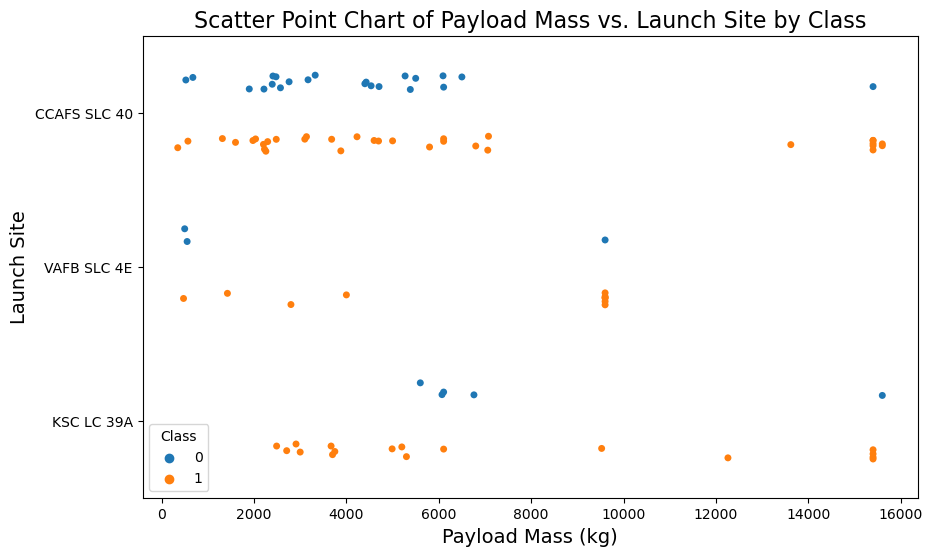

In [16]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

# Ajustando la escala y tamaño de la figura
plt.figure(figsize=(10, 6))

# Creación del gráfico con stripplot
sns.stripplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, jitter=True, dodge=True)

# Configuración de los títulos de los ejes y leyenda
plt.ylabel("Launch Site", fontsize=14)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.title("Scatter Point Chart of Payload Mass vs. Launch Site by Class", fontsize=16)
plt.legend(title='Class', loc='best')

# Muestra el gráfico
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


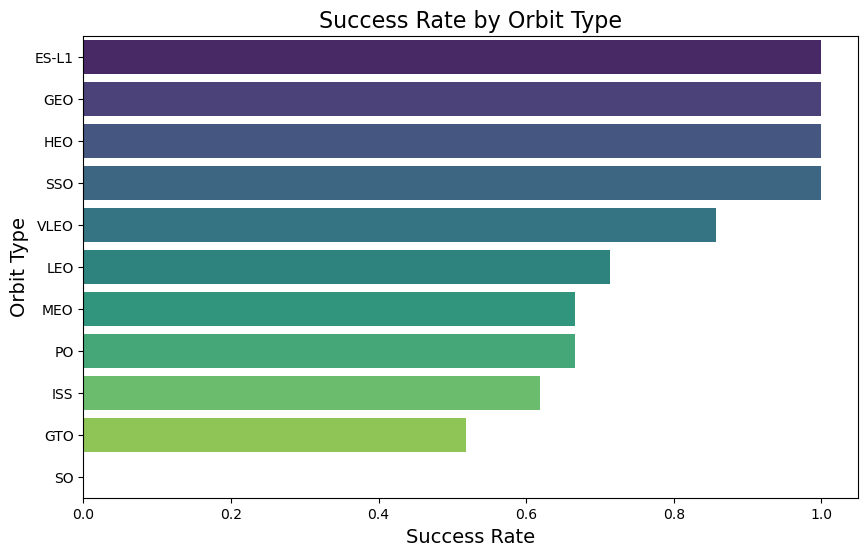

In [17]:
### TASK  3: Visualize the relationship between success rate of each orbit type
# Calculamos la tasa de éxito por tipo de órbita
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Ordenamos los resultados por tasa de éxito para una mejor visualización
success_rate = success_rate.sort_values('Class', ascending=False)

# Creación del gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Orbit', data=success_rate, palette='viridis')

# Configuración de los títulos de los ejes y del gráfico
plt.xlabel('Success Rate', fontsize=14)
plt.ylabel('Orbit Type', fontsize=14)
plt.title('Success Rate by Orbit Type', fontsize=16)

# Mostramos el gráfico
plt.show()

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


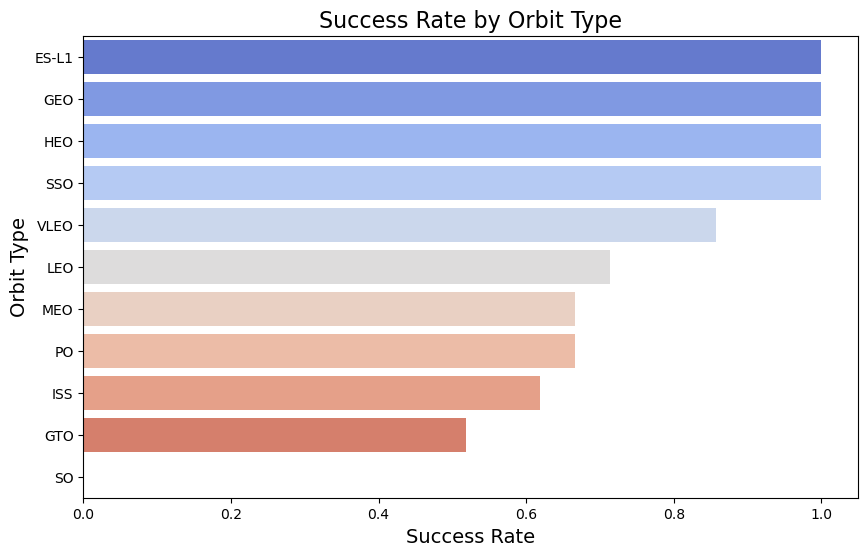

In [18]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Asumiendo que 'df' es tu DataFrame
# 1. Agrupamos por 'Orbit' y calculamos la media de 'Class'
success_rate_by_orbit = df.groupby('Orbit')['Class'].mean().reset_index()

# 2. Opcional: Ordenar los resultados por tasa de éxito para una mejor visualización
success_rate_by_orbit = success_rate_by_orbit.sort_values(by='Class', ascending=False)

# 3. Crear un gráfico de barras para visualizar la tasa de éxito de cada tipo de órbita
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Orbit', data=success_rate_by_orbit, palette='coolwarm')

# Configuración de los títulos y etiquetas
plt.xlabel('Success Rate', fontsize=14)
plt.ylabel('Orbit Type', fontsize=14)
plt.title('Success Rate by Orbit Type', fontsize=16)

# Mostrar el gráfico
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


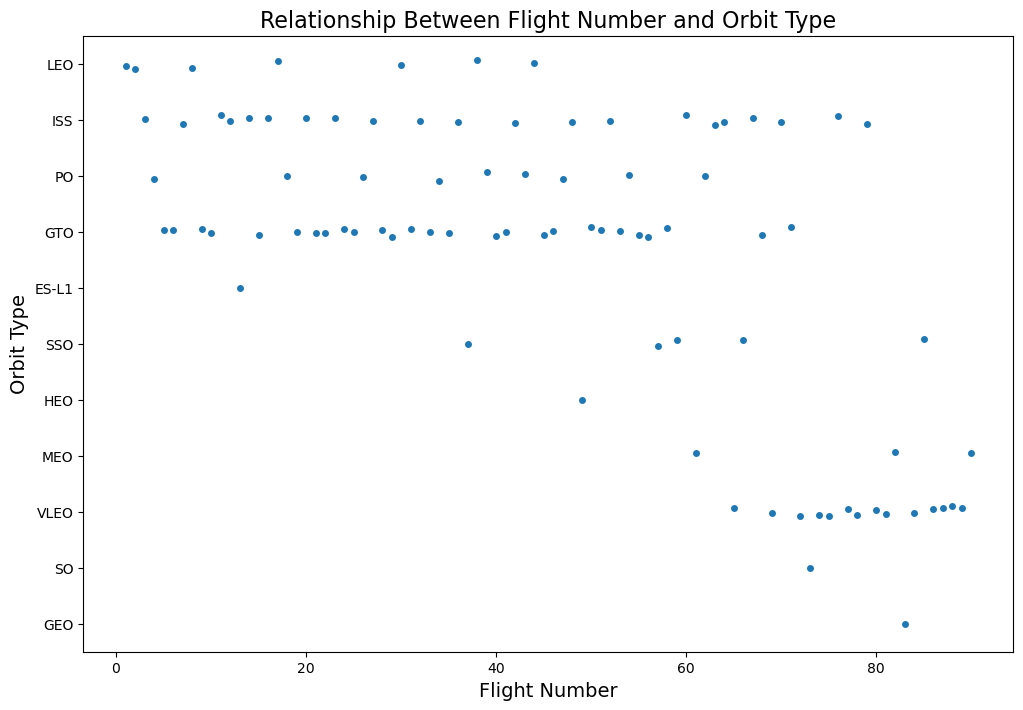

In [19]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
# Ajustando el tamaño de la figura
plt.figure(figsize=(12, 8))

# Creando el gráfico de puntos
sns.stripplot(x="FlightNumber", y="Orbit", data=df, jitter=0.1, size=5)

# Configurando los títulos y etiquetas
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Relationship Between Flight Number and Orbit Type", fontsize=16)

# Mostrando el gráfico
plt.show()

In [45]:



sns.catplot(y="LaunchSite",x="FlightNumber",hue="Class", col=”Class”, data=df, aspect = 1)

plt.ylabel("Launch Site",fontsize=15)

plt.xlabel("Flight Number",fontsize=15)

plt.show()

SyntaxError: invalid character '”' (U+201D) (329909599.py, line 1)

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


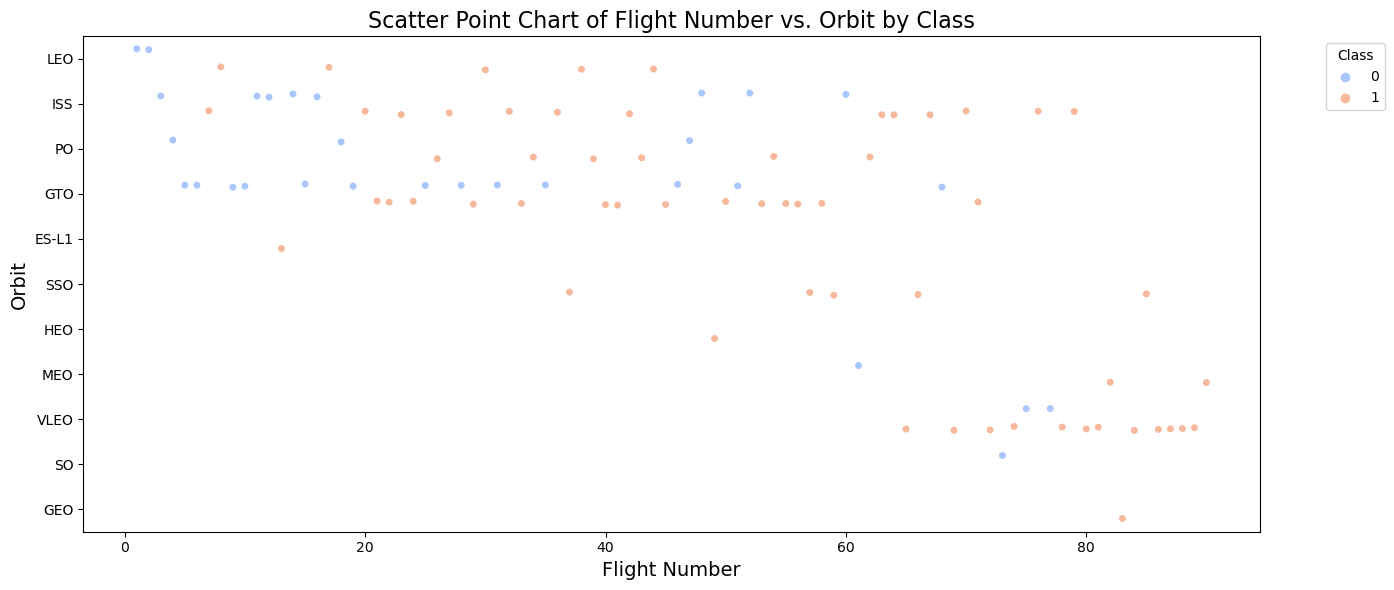

In [21]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

# Ajuste del tamaño de la figura para una mejor visualización
plt.figure(figsize=(14, 6))

# Creación del gráfico de puntos con sns.stripplot
sns.stripplot(x="FlightNumber", y="Orbit", hue="Class", data=df, jitter=True, dodge=True, palette="coolwarm")

# Configuración de los títulos y etiquetas
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit", fontsize=14)
plt.title("Scatter Point Chart of Flight Number vs. Orbit by Class", fontsize=16)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


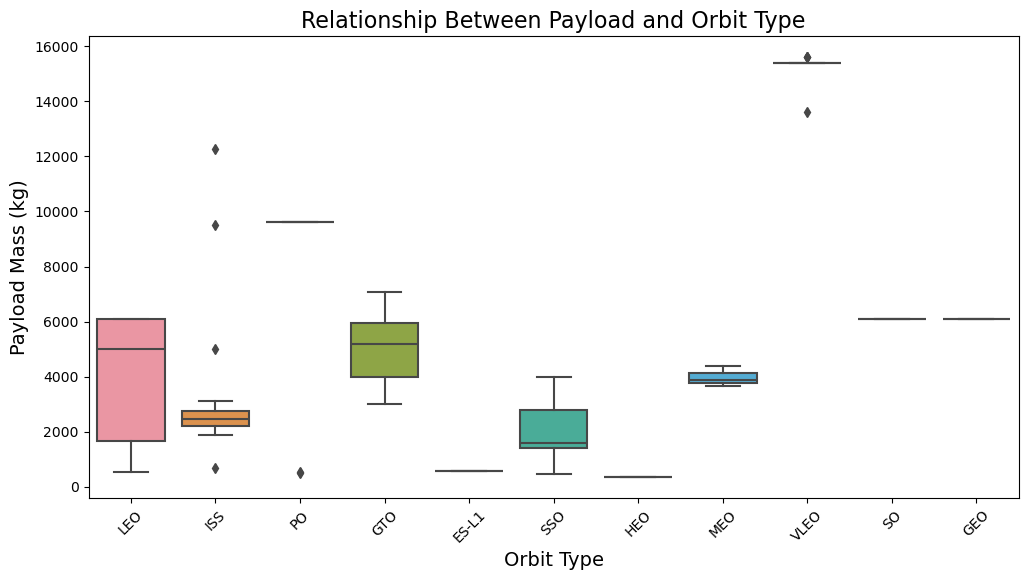

In [23]:
### TASK  5: Visualize the relationship between Payload and Orbit type
# Ajuste del tamaño de la figura para una mejor visualización
plt.figure(figsize=(12, 6))

# Creación del gráfico de cajas y bigotes
sns.boxplot(x="Orbit", y="PayloadMass", data=df)

# Configuración de los títulos y etiquetas
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Payload Mass (kg)", fontsize=14)
plt.title("Relationship Between Payload and Orbit Type", fontsize=16)

# Mejorar la disposición para evitar la superposición de etiquetas
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

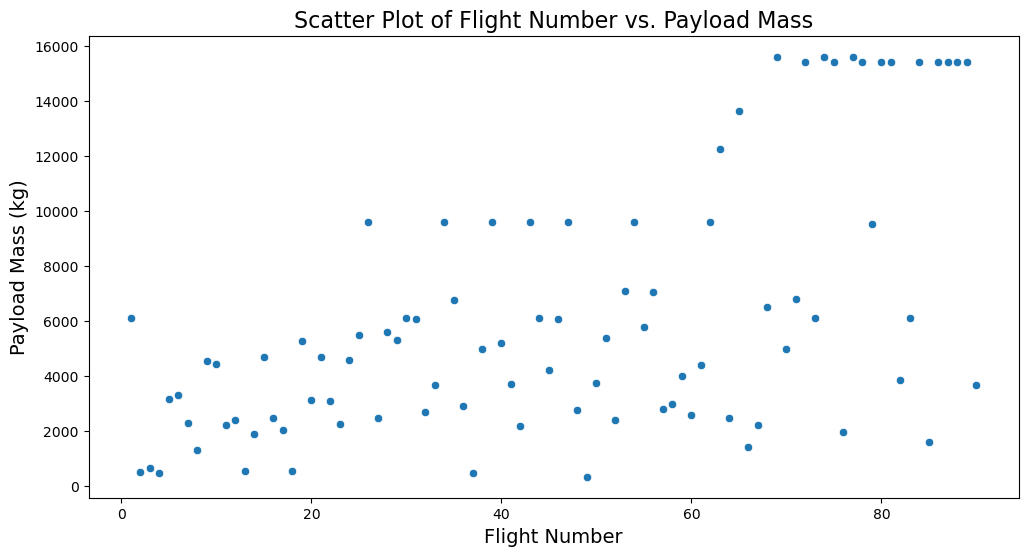

In [24]:
# Ajustando el tamaño de la figura
plt.figure(figsize=(12, 6))

# Creación del gráfico de dispersión
sns.scatterplot(x="FlightNumber", y="PayloadMass", data=df)

# Configuración de los títulos y etiquetas
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Payload Mass (kg)", fontsize=14)
plt.title("Scatter Plot of Flight Number vs. Payload Mass", fontsize=16)

# Mostrando el gráfico
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


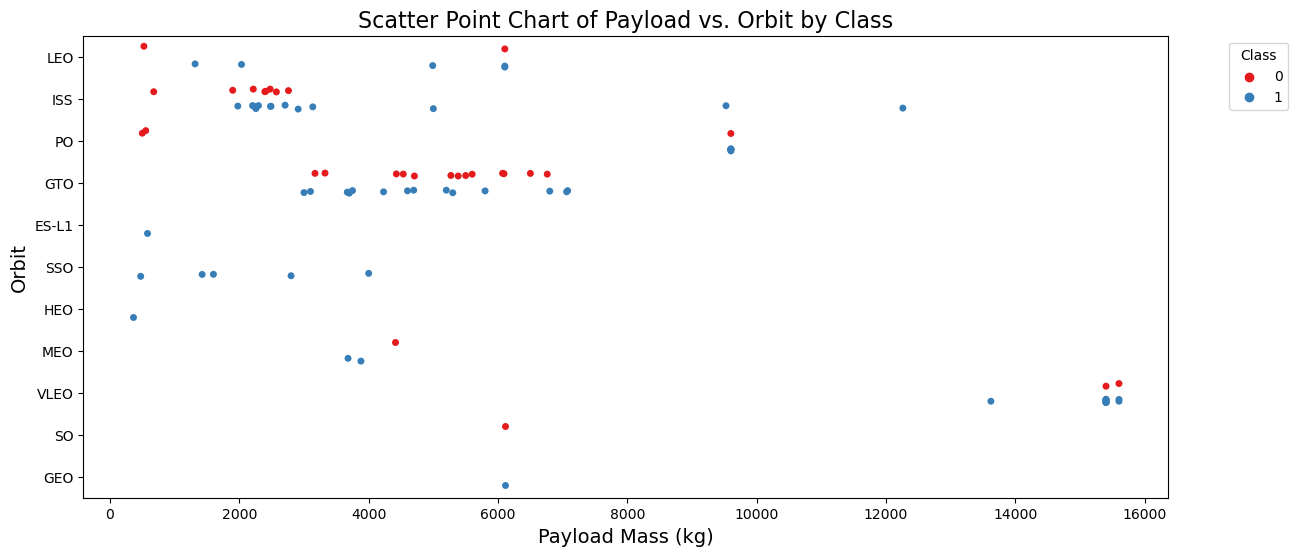

In [26]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
# Ajustando el tamaño de la figura para una mejor visualización
plt.figure(figsize=(14, 6))

# Creación del gráfico con sns.stripplot
sns.stripplot(x="PayloadMass", y="Orbit", hue="Class", data=df, jitter=True, dodge=True, palette="Set1")

# Configuración de los títulos y etiquetas
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit", fontsize=14)
plt.title("Scatter Point Chart of Payload vs. Orbit by Class", fontsize=16)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Class'>

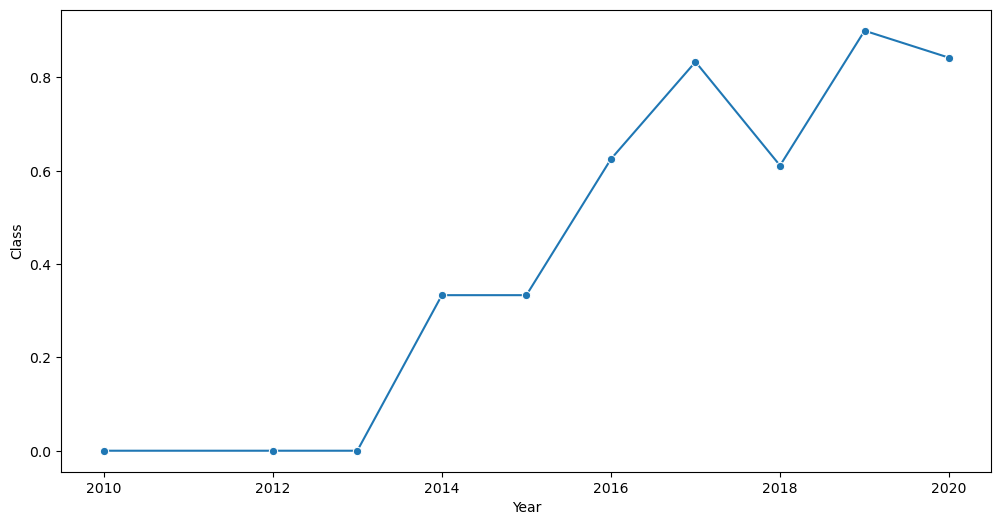

In [28]:
### TASK  6: Visualize the launch success yearly trend

# Asegurarse de que 'Date' es un tipo de datos de fecha y hora
df['Date'] = pd.to_datetime(df['Date'])

# Extraer el año de la fecha de lanzamiento y crear una nueva columna 'Year'
df['Year'] = df['Date'].dt.year

# Agrupar por 'Year' y calcular la tasa de éxito media
success_rate_by_year = df.groupby('Year')['Class'].mean().reset_index()

# Crear un gráfico de línea para visualizar la tasa de éxito anual
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Class', data=success_rate_by_year, marker='o')

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [29]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

AttributeError: 'Timestamp' object has no attribute 'split'

C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


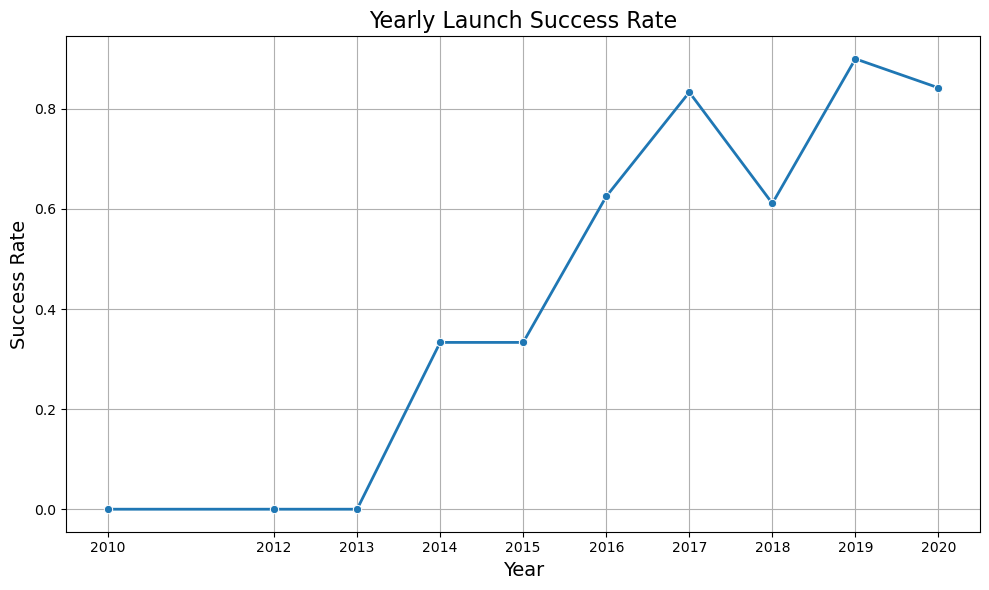

In [30]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# Extraer el año de la fecha y crear una nueva columna 'Year'
df['Year'] = df['Date'].dt.year

# Agrupar los datos por año y calcular la tasa de éxito media
success_rate_by_year = df.groupby('Year')['Class'].mean().reset_index()

# Ahora, vamos a crear el gráfico de línea
plt.figure(figsize=(10, 6))
sns.lineplot(data=success_rate_by_year, x='Year', y='Class', marker='o', linestyle='-', linewidth=2)

# Configurando los títulos y etiquetas del gráfico
plt.title('Yearly Launch Success Rate', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.xticks(success_rate_by_year['Year'])  # Asegurar que todos los años estén etiquetados
plt.grid(True)  # Opcional, para una mejor lectura

# Mostrar el gráfico
plt.tight_layout()
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [31]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [32]:
### TASK  7: Create dummy variables to categorical columns
# Asumiendo que 'features' es tu DataFrame inicial
# Seleccionando las columnas a codificar
columns_to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Aplicando get_dummies a las columnas seleccionadas
features_one_hot = pd.get_dummies(features, columns=columns_to_encode)

# Mostrando las primeras filas del nuevo DataFrame para verificar las columnas codificadas
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0            0        False      False  ...         False         False   
1            0        False      False  ...         False         False   
2            0        False      False  ...         False         False   
3            0        False      False  ...         False         False   
4            0        False      False  ...         False         False   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0         False         False      

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [33]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs',
       'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO',
       'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO',
       'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40',
       'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E',
       'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial

In [36]:
### TASK  8: Cast all numeric columns to `float64`
numeric_cols = features_one_hot.select_dtypes(include=['int64', 'float64']).columns

# Convertimos estas columnas numéricas a float64
features_one_hot[numeric_cols] = features_one_hot[numeric_cols].astype('float64')

# Verificamos los tipos de datos para asegurarnos de que la conversión fue exitosa
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056       bool
Serial_B1058       bool
Serial_B1059       bool
Serial_B1060       bool
Serial_B1062       bool
Length: 80, dtype: object


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [37]:
# HINT: use astype function
# Convirtiendo todo el DataFrame 'features_one_hot' a float64
features_one_hot = features_one_hot.astype('float64')

# Verificamos los tipos de datos para asegurarnos de que la conversión fue exitosa
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [39]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)


In [40]:
features_one_hot.shape

(90, 80)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
